## Calcular Distancias de Escuelas a establecimientos que venden alcohol mas cercanos

# Chequen los PATHS 

Primero se importan los scripts y scipy

In [17]:

from scripts.schools import main as compute_schools
from scripts.alcohol import main as compute_alcohol
from scipy.spatial import KDTree
import pandas as pd


Se define la funcion que se va a aplicar sobre el DF

In [4]:
# Encuentra el establecimiento más cercano a una coordenada dado un arbol de KDTree
def find_nearest(row, tree, establishments):
    distance, index = tree.query([row['latitud'], row['longitud']])
    return establishments.iloc[index]['nom_estab'], distance

# Seccion de PATHS

In [5]:
# Lista de rutas de archivos Negocios DENUE
paths_negocios_denue = [
    # AQUI AGREGUEN LOS PATHS DE SUS CSVs
    '/home/jay/repos/AI/feminicidios/denue_00_46111_csv/conjunto_de_datos/denue_inegi_46111_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46112-46311_csv/conjunto_de_datos/denue_inegi_46112-46311_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46321-46531_csv/conjunto_de_datos/denue_inegi_46321-46531_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46591-46911_csv/conjunto_de_datos/denue_inegi_46591-46911_.csv',
    
    # Sin querer puse el PATH de las escuelas, xd que bueno que despues de get_alcohol() el DF estaba vacio
    # Lo deje para debuggear
    # '/home/jay/repos/AI/feminicidios/denue_00_61_csv/conjunto_de_datos/denue_inegi_61_.csv'
]

# Ruta de archivo Escuelas DENUE
file_path = '/home/jay/repos/AI/feminicidios/denue_00_61_csv/conjunto_de_datos/denue_inegi_61_.csv'

# Ahora se van a importar los DF de los negocios que venden alcohol y las escuelas

In [6]:
# Se itera sobre la lista de PATHS, la verdad no se por que imprime
alcohol_establishments = compute_alcohol(paths_negocios_denue)

In [7]:
# Se carga el DF dado un solo PATH
schools = compute_schools(file_path)

## EDA

In [15]:
alcohol_establishments.head()

,id,nom_estab,nombre_act,latitud,longitud
0,8794778,7 ELEVEN,"Comercio al por menor en tiendas de abarrotes,...",25.752659,-100.198830
1,9346815,7 ELEVEN MEXICO,"Comercio al por menor en tiendas de abarrotes,...",25.685572,-100.474568
2,2962357,AB. ESMERALDA,"Comercio al por menor en tiendas de abarrotes,...",25.733921,-100.386254
3,3019167,ABA FRUT LA ROSITA,"Comercio al por menor en tiendas de abarrotes,...",25.685544,-100.410971
4,7350331,ABARR0TES FLORES,"Comercio al por menor en tiendas de abarrotes,...",25.754152,-100.106617


In [11]:
schools.head()


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,46594,01001611122002634000000000U4,2010 BICENTENARIO DE LA INDEPENDENCIA DE MEXIC...,INSTITUTO DE EDUCACION DE AGUASCALIENTES,611122,Escuelas de educación primaria del sector público,31 a 50 personas,CALLE,SEBASTIAN DE LARA,AVENIDA,...,Aguascalientes,3539,3,NaN,NaN,NaN,Fijo,21.931757,-102.255818,2014-12
1,8624796,01001713943003871000000000U7,ACADEMA BLACK DEMON,NaN,611621,Escuelas de deporte del sector privado,0 a 5 personas,CALLE,TALAMANTES,AVENIDA,...,Aguascalientes,0591,19,4.494338e+09,NaN,NaN,Fijo,21.879529,-102.312719,2019-11
2,9113033,01001611621001461000000000U4,ACADEMIA DE ARTES MARCIALES,NaN,611621,Escuelas de deporte del sector privado,0 a 5 personas,ANDADOR,NINGUNO,AVENIDA,...,Aguascalientes,2460,48,NaN,NaN,NaN,Fijo,21.868127,-102.270112,2019-11
3,7461715,01011611611000011000000000U8,ACADEMIA DE BAILDE YL DANCE,NaN,611611,Escuelas de arte del sector privado,0 a 5 personas,AVENIDA,CONSTITUCION,CALLE,...,Ex-Viñedos Guadalupe ...,0136,4,4.493916e+09,NaN,NaN,Fijo,21.958495,-102.271889,2019-11
4,45184,01001722519003621010000000U3,ACADEMIA DE BAILE BAILA CON LES,NaN,611611,Escuelas de arte del sector privado,0 a 5 personas,PRIVADA,CULTURA MAYA 120,AVENIDA,...,Aguascalientes,3191,4,4.492731e+09,NaN,NaN,Fijo,21.907149,-102.243783,2014-12


In [13]:
alcohol_establishments.describe() # no aplica porque no hay datos numericos
schools.describe() # no aplica porque no hay datos numericos

,id,codigo_act,numero_ext,numero_int,cod_postal,cve_ent,cve_mun,cve_loc,manzana,telefono,latitud,longitud
count,1.485500e+05,148550.000000,92789.000000,45222.000000,148013.000000,148550.000000,148550.000000,148550.000000,148550.000000,5.343600e+04,148550.000000,148550.000000
mean,3.913393e+06,611231.298768,545.001983,20.116934,55815.446238,16.675220,53.780222,16.602551,21.802652,7.526570e+09,21.248106,-100.224554
std,2.785758e+06,191.670017,1726.274556,687.714558,25648.147124,7.991977,69.931650,106.770112,53.360076,1.534627e+11,3.724601,5.083747
min,1.400000e+01,611111.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,14.589895,-117.122988
25%,1.693579e+06,611112.000000,1.000000,0.000000,36568.000000,11.000000,12.000000,1.000000,7.000000,4.431572e+09,19.249296,-102.245701
50%,3.277022e+06,611122.000000,70.000000,0.000000,56356.000000,15.000000,33.000000,1.000000,16.000000,5.568008e+09,19.810356,-99.244706
75%,6.441242e+06,611182.000000,383.000000,0.000000,76140.000000,22.000000,70.000000,1.000000,27.000000,7.787826e+09,22.155402,-98.196809
max,9.470775e+06,611710.000000,92048.000000,91011.000000,99980.000000,32.000000,570.000000,9003.000000,800.000000,3.515121e+13,32.717112,-86.725188


In [18]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

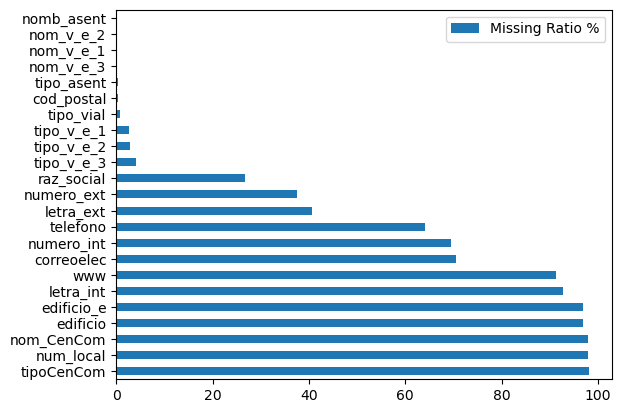

In [22]:

plot_nas(schools)

In [23]:
plot_nas(alcohol_establishments) # No NA's found

No NAs found


# Se crea un KDTree
# Se guarda el indice y la distancia del establecimiento mas cercano a la escuela

In [24]:
# # Tree para aplicar busqueda 
# alcohol_tree = KDTree(alcohol_establishments[['latitud', 'longitud']])

# # simon
# schools['nearest_alcohol'], schools['distance_to_nearest_alcohol'] = zip(*schools.apply(lambda row: find_nearest(row, alcohol_tree, alcohol_establishments), axis=1))
